In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [35]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 1- Explore Data

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
data.shape

(200, 5)

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [40]:
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
51,52,Male,33,42,60
66,67,Female,43,48,50
171,172,Male,28,87,75


In [42]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2- Transform Data

In [43]:
la = LabelEncoder()
data.Gender = la.fit_transform(data.Gender)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3- Creat Module

In [44]:
model = KMeans(n_clusters = 5)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [45]:
model.inertia_

157283.1491928192

In [46]:
clustersn = []
j = []

for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)


pd.DataFrame({"clusters":clustersn,"j":j})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,clusters,j
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195393.503846
4,5,157183.296374
5,6,122670.552668
6,7,103243.950680
7,8,86053.674448
8,9,76894.301576
9,10,69220.571402


Text(0, 0.5, 'y')

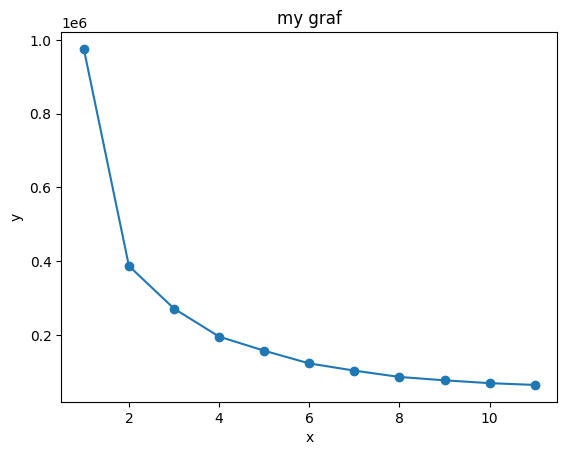

In [47]:
plt.plot(clustersn,j,marker = 'o')
plt.title('my graf')
plt.xlabel('x')
plt.ylabel('y')

In [49]:
model = KMeans(n_clusters = 4)
model.fit(data)
pre = model.predict(data)
pre

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [50]:
data['k_mean'] = pre
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


In [51]:
df1 = data[data['k_mean'] == 0]
df2 = data[data['k_mean'] == 1]
df3 = data[data['k_mean'] == 2]
df4 = data[data['k_mean'] == 3]

In [52]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
128,129,1,59,71,11,0
130,131,1,47,71,9,0
132,133,0,25,72,34,0
134,135,1,20,73,5,0
136,137,0,44,73,7,0
138,139,1,19,74,10,0
140,141,0,57,75,5,0
142,143,0,28,76,40,0
144,145,1,25,77,12,0
146,147,1,48,77,36,0


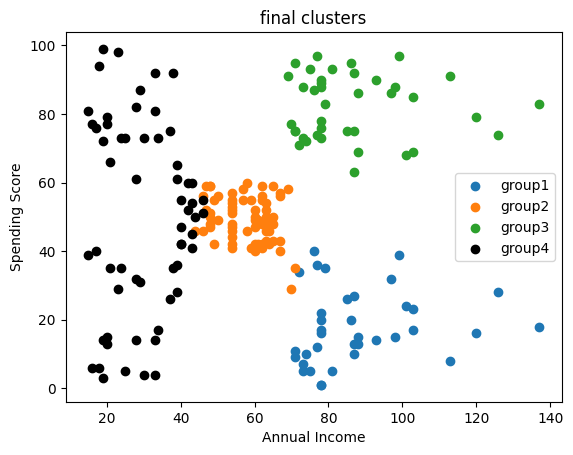

In [53]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('final clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

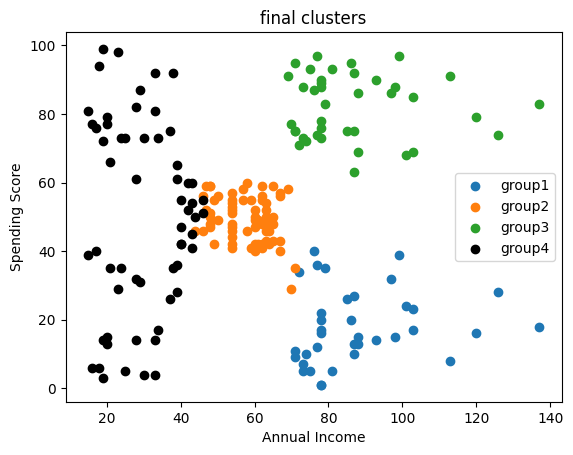

In [54]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('final clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## 4- Data Analysis

<Axes: ylabel='count'>

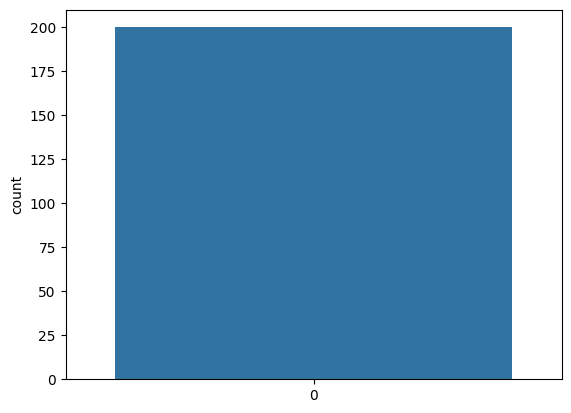

In [55]:
sns.countplot(data.k_mean)

In [56]:
data.k_mean.value_counts()

1    66
3    59
2    39
0    36
Name: k_mean, dtype: int64

<Axes: ylabel='k_mean'>

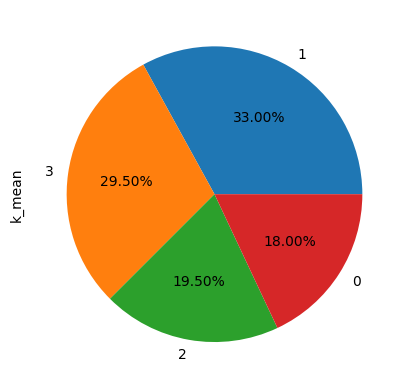

In [57]:
data.k_mean.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

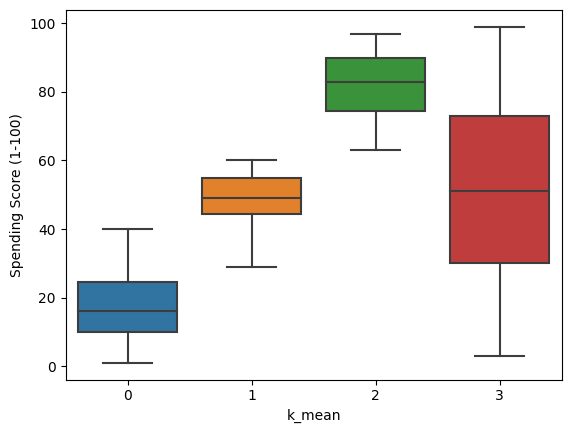

In [58]:
sns.boxplot(x='k_mean', y='Spending Score (1-100)', data=data)

<Axes: xlabel='k_mean', ylabel='count'>

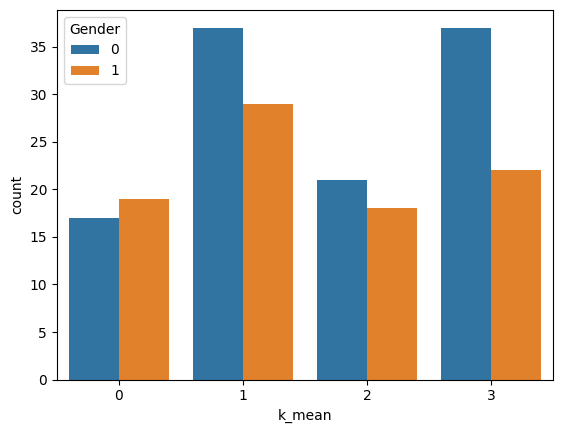

In [59]:
sns.countplot(x=data.k_mean,hue=data.Gender)

<Axes: xlabel='Gender', ylabel='count'>

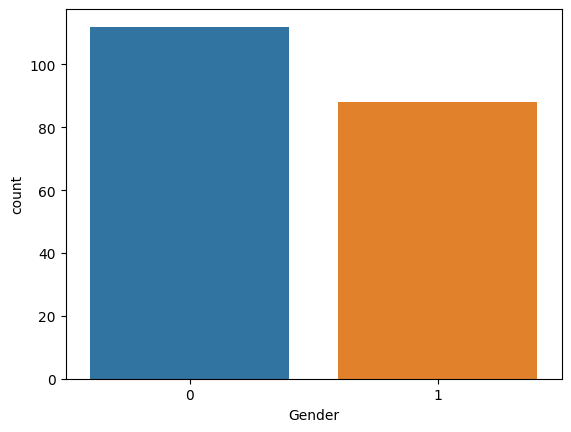

In [60]:
sns.countplot(data = data,x='Gender')

<Axes: >

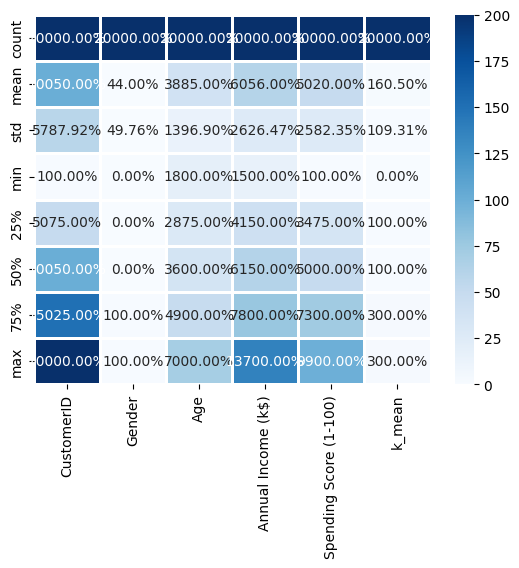

In [71]:
sns.heatmap(data.describe(),annot = True, fmt = "0.2%" ,linewidth = 1, cmap = "Blues")

In [ ]:
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


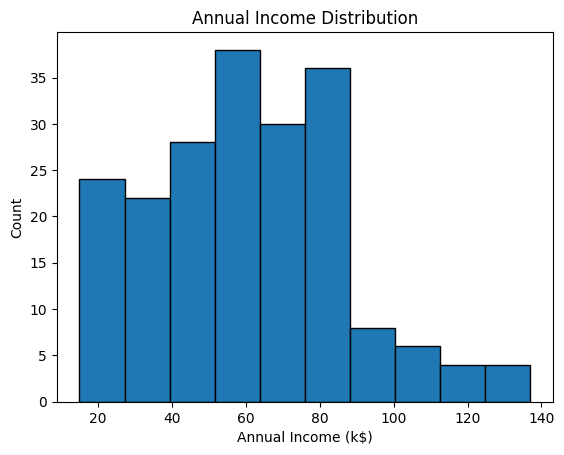

In [72]:
plt.hist(data['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


In [ ]:
plt.hist(data['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


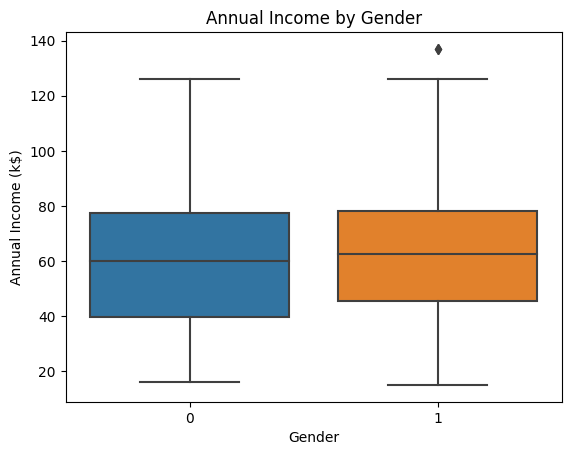

In [73]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Annual Income by Gender')
plt.show()


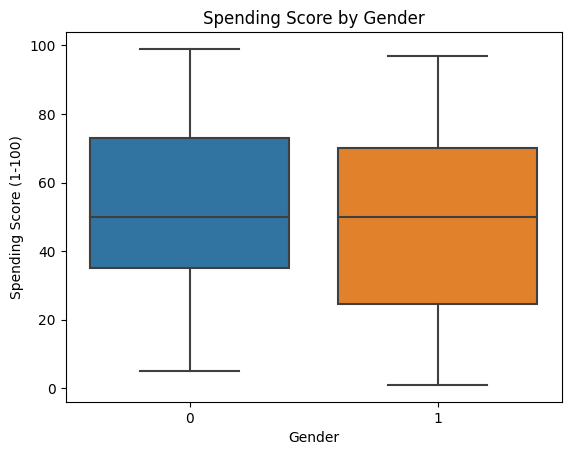

In [74]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Spending Score by Gender')
plt.show()


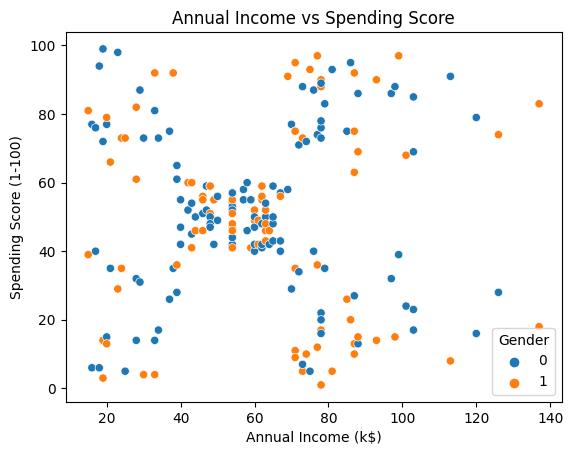

In [75]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()


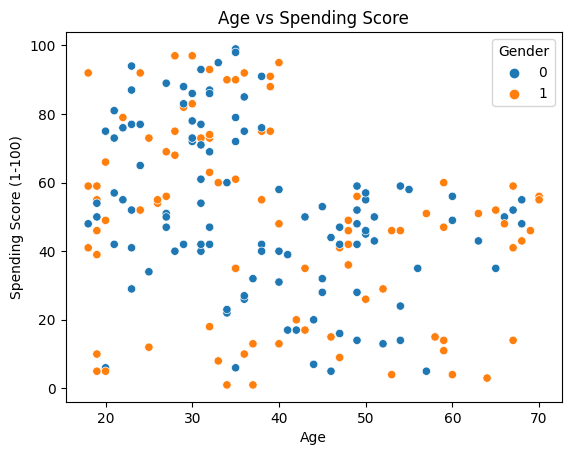

In [76]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs Spending Score')
plt.show()


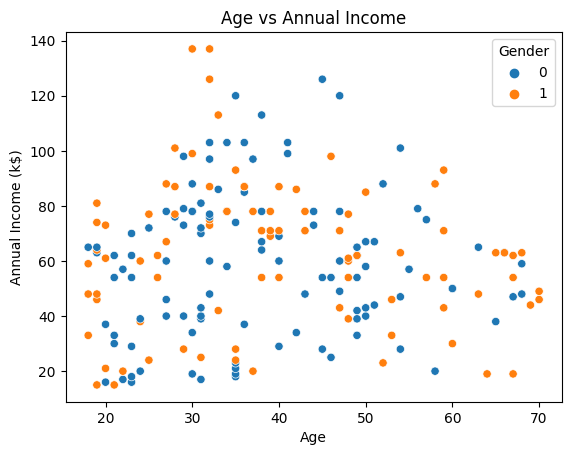

In [77]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs Annual Income')
plt.show()


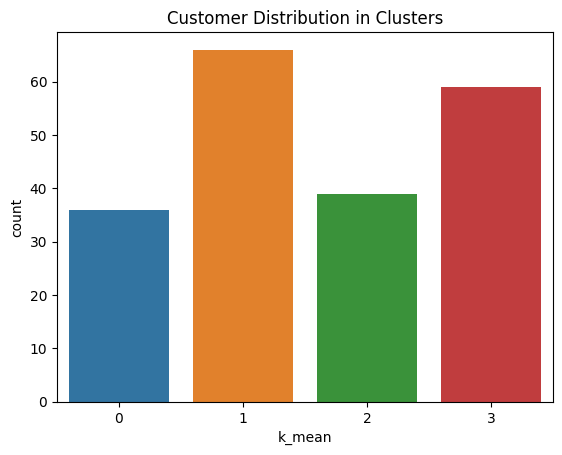

In [79]:
sns.countplot(x='k_mean', data=data)
plt.title('Customer Distribution in Clusters')
plt.show()


In [30]:
data.to_csv('my.csv',index=False)